In [29]:
# CheckPoint 1, Semetre 4
# Nesse notebook será mostrado o desempenho de cada tipo de algoritimo, serão usados algoritmos: Tradicional, Strassen, Winograd e Karstadt


In [30]:
pip install memory-profiler

In [31]:
import numpy as np #Biblioteca escolhida para efetuar criação de matrizes e multiplicação das mesmas.
import time #Biblioteca escolhida para efutar diferença de tempo, para a realização de desempenho por tempo
import matplotlib.pyplot as plt #Bilblioteca para disposição dos gráficos
import timeit #Biblioteca de tempo que aceita tempos logarítmicos
from memory_profiler import memory_usage #Biblioteca de uso de memória

In [32]:
"""
Esta função é um algorítimo de múltiplicação de matrizes tradicional.

@return A matriz resultante da multiplicação de A por B
@throws ValueError se o número de colunas de A não for igual ao número de linhas de B
"""
def AlgTradicional(A, B):
    #param A: Matriz A representada como um array 2d
    #param B: Matriz B representada como um array 2d

    # Obtém o número de linhas e colunas da matriz A
    rows_A, cols_A = A.shape
    # Obtém o número de linhas e colunas da matriz B
    rows_B, cols_B = B.shape


    # Verifica se a multiplicação é possível, comparando o número de colunas de A e o número de linhas de B
    if cols_A != rows_B:
        # Caso não seja, nos joga uma exceção, e para a execução do código
        raise ValueError("O número de colunas de A deve ser igual ao número de linhas de B para multiplicação de matrizes.")

    # Declara a matriz C e a preenche com zeros, tendo o numero de linhas de A e colunas de B
    C = np.zeros((rows_A, cols_B))

    start_time = time.time()

    # Percorre cada linha de A
    for i in range(rows_A):
        # Percorre cada coluna de B
        for j in range(cols_B):
            # Percorre cada coluna de A
            for k in range(cols_A):
                # Multiplica o produto de A[i, k] com B[k, j] e adiciona a C em seu respectivo índice
                C[i, j] += A[i, k] * B[k, j]

    end_time = time.time()

    execution_time = end_time - start_time

    print(f"Tempo de execução: {execution_time:.6f} segundos")

    # Retorna a matriz C, resultante da multiplicação
    return C

In [33]:
def AlgStrassen(A,B):
    #param A: Matriz A representada como um array 2d
    #param B: Matriz B representada como um array 2d

    n = len(A)
    if n <= 2:  # Base case
        return np.dot(A, B)

    # Partition matrices into submatrices
    mid = n // 2
    A11 = A[:mid, :mid]
    A12 = A[:mid, mid:]
    A21 = A[mid:, :mid]
    A22 = A[mid:, mid:]
    B11 = B[:mid, :mid]
    B12 = B[:mid, mid:]
    B21 = B[mid:, :mid]
    B22 = B[mid:, mid:]

    # Recursive multiplication
    P1 = AlgStrassen(A11, B12 - B22)
    P2 = AlgStrassen(A11 + A12, B22)
    P3 = AlgStrassen(A21 + A22, B11)
    P4 = AlgStrassen(A22, B21 - B11)
    P5 = AlgStrassen(A11 + A22, B11 + B22)
    P6 = AlgStrassen(A12 - A22, B21 + B22)
    P7 = AlgStrassen(A11 - A21, B11 + B12)

    # Combine results to form C
    C11 = P5 + P4 - P2 + P6
    C12 = P1 + P2
    C21 = P3 + P4
    C22 = P5 + P1 - P3 - P7

    # Combine quadrants to form C
    D = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))
    return D

In [34]:
def AlgWinograd(A, B):
    #param A: Matriz A representada como um array 2d
    #param B: Matriz B representada como um array 2d

    # Elementos da matriz A
    a11, a12 = A[0][0], A[0][1]
    a21, a22 = A[1][0], A[1][1]

    # Elementos da matriz B
    b11, b12 = B[0][0], B[0][1]
    b21, b22 = B[1][0], B[1][1]

    # Calcula os termos intermediários (Produtos parciais)
    P1 = (a11 + a22) * (b11 + b22)
    P2 = (a21 + a22) * b11
    P3 = a11 * (b12 - b22)
    P4 = a22 * (b21 - b11)
    P5 = (a11 + a12) * b22
    P6 = (a21 - a11) * (b11 + b12)
    P7 = (a12 - a22) * (b21 + b22)

    # Calcula os elementos da matriz C (resultado)
    c11 = P1 + P4 - P5 + P7
    c12 = P3 + P5
    c21 = P2 + P4
    c22 = P1 - P2 + P3 + P6

    # Retorna a matriz resultante C
    return [[c11, c12], [c21, c22]]




In [35]:
# Funções auxiliares para adição e subtração de matrizes
def add(A, B):
    # Retorna a soma de duas matrizes A e B
    return [[A[i][j] + B[i][j] for j in range(len(A[0]))] for i in range(len(A))]

def sub(A, B):
    # Retorna a subtração de duas matrizes A e B
    return [[A[i][j] - B[i][j] for j in range(len(A[0]))] for i in range(len(A))]


In [36]:
def AlgKarstadt(A, B):
    n = len(A)  # Tamanho da matriz (assumimos que A é quadrada)

    # Caso base para a recursão: se a matriz é 1x1, realiza a multiplicação diretamente
    if n == 1:
        return [[A[0][0] * B[0][0]]]

    mid = n // 2  # Define o ponto médio para dividir a matriz em 4 blocos menores (quadrantes)

    # Divide a matriz A em 4 submatrizes (quadrantes): A11, A12, A21 e A22
    A11 = [row[:mid] for row in A[:mid]]  # Parte superior esquerda de A
    A12 = [row[mid:] for row in A[:mid]]  # Parte superior direita de A
    A21 = [row[:mid] for row in A[mid:]]  # Parte inferior esquerda de A
    A22 = [row[mid:] for row in A[mid:]]  # Parte inferior direita de A

    # Divide a matriz B em 4 submatrizes (quadrantes): B11, B12, B21 e B22
    B11 = [row[:mid] for row in B[:mid]]  # Parte superior esquerda de B
    B12 = [row[mid:] for row in B[:mid]]  # Parte superior direita de B
    B21 = [row[:mid] for row in B[mid:]]  # Parte inferior esquerda de B
    B22 = [row[mid:] for row in B[mid:]]  # Parte inferior direita de B

    # Calcula os produtos intermediários usando a técnica de Karstadt
    M1 = AlgKarstadt(add(A11, A22), add(B11, B22))  # M1 = (A11 + A22) * (B11 + B22)
    M2 = AlgKarstadt(add(A21, A22), B11)            # M2 = (A21 + A22) * B11
    M3 = AlgKarstadt(A11, sub(B12, B22))            # M3 = A11 * (B12 - B22)
    M4 = AlgKarstadt(A22, sub(B21, B11))            # M4 = A22 * (B21 - B11)
    M5 = AlgKarstadt(add(A11, A12), B22)            # M5 = (A11 + A12) * B22
    M6 = AlgKarstadt(sub(A21, A11), add(B11, B12))  # M6 = (A21 - A11) * (B11 + B12)
    M7 = AlgKarstadt(sub(A12, A22), add(B21, B22))  # M7 = (A12 - A22) * (B21 + B22)

    # Combina os produtos intermediários para formar os quadrantes da matriz resultante C
    C11 = add(sub(add(M1, M4), M5), M7)  # C11 = M1 + M4 - M5 + M7
    C12 = add(M3, M5)                    # C12 = M3 + M5
    C21 = add(M2, M4)                    # C21 = M2 + M4
    C22 = add(sub(add(M1, M3), M2), M6)  # C22 = M1 + M3 - M2 + M6

    # Recombina os quadrantes para formar a matriz resultante C
    C = np.zeros((n, n), dtype=int)  # Inicializa a matriz C com zeros de tamanho n x n
    for i in range(mid):
        for j in range(mid):
            C[i][j] = C11[i][j]             # Preenche o quadrante superior esquerdo com C11
            C[i][j + mid] = C12[i][j]       # Preenche o quadrante superior direito com C12
            C[i + mid][j] = C21[i][j]       # Preenche o quadrante inferior esquerdo com C21
            C[i + mid][j + mid] = C22[i][j] # Preenche o quadrante inferior direito com C22

    return C  # Retorna a matriz resultante C

In [37]:
# Time the algorithms
def time_algorithm(algorithm, n):
    A = np.random.randint(10, size=(n, n))
    B = np.random.randint(10, size=(n, n))
    timer = timeit.Timer(lambda: algorithm(A, B))
    return timer.timeit(number=1)

# Measure the memory used by the algorithims
def measure_memory(func, A, B):
    mem_usage = memory_usage((func, (A, B)), interval=0.1)
    return max(mem_usage) - min(mem_usage)

In [38]:
# Exemplo de uso
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

# Multiplica as matrizes A e B usando o algoritmo Tradicional
C = AlgTradicional(A, B)
print("Resultado da multiplicação de matrizes Algoritmo Tradicional:\n", C)

# Multiplica as matrizes A e B usando o algoritmo de Strassen
D = AlgStrassen(A, B)
print("Matrix D Algoritmo Strassen:\n", D)

# Multiplica as matrizes A e B usando o algoritmo de Winograd
E = AlgWinograd(A, B)
print("Matrizes E Algoritmo Winograd:")
for linha1 in E:
    print(linha1)

# Multiplica as matrizes A e B usando o algoritmo de Karstadt
F = AlgKarstadt(A, B)
print("Resultado da multiplicação de matrizes Algoritmo Karstadt:\n", C)


Tempo de execução: 0.000024 segundos
Resultado da multiplicação de matrizes Algoritmo Tradicional:
 [[19. 22.]
 [43. 50.]]
Matrix D Algoritmo Strassen:
 [[19 22]
 [43 50]]
Matrizes E Algoritmo Winograd:
[19, 22]
[43, 50]
Resultado da multiplicação de matrizes Algoritmo Karstadt:
 [[19. 22.]
 [43. 50.]]


Tempo de execução: 0.000015 segundos
Tempo de execução: 0.000095 segundos
Tempo de execução: 0.000738 segundos
Tempo de execução: 0.010480 segundos
Tempo de execução: 0.024647 segundos
Tempo de execução: 0.207530 segundos


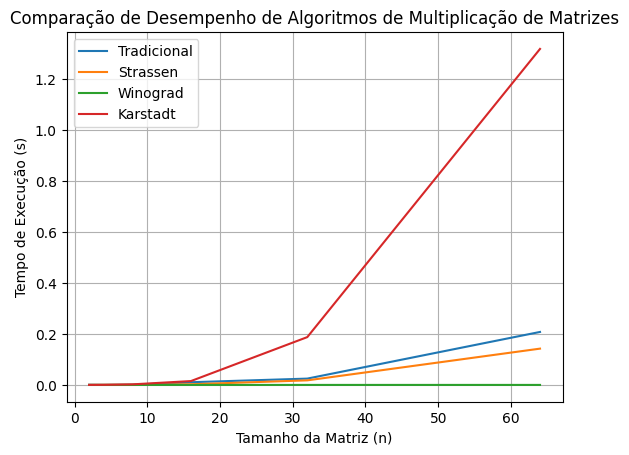

In [39]:
"""
Execução dos códigos e comparação dos tempos, juntamente com a criação de um gráfico
"""

# Compara o tempo dos algorítimos
# Tamanhos das matrizes para teste

sizes = [2, 4, 8, 16, 32, 64]

# Tempo de execução para cada algoritmo
traditional_times = [time_algorithm(AlgTradicional, n) for n in sizes]
strassen_times = [time_algorithm(AlgStrassen, n) for n in sizes]
winograd_times = [time_algorithm(AlgWinograd, n) for n in sizes]
karstadt_times = [time_algorithm(AlgKarstadt, n) for n in sizes]

# Plotando os resultados
plt.plot(sizes, traditional_times, label='Tradicional')
plt.plot(sizes, strassen_times, label='Strassen')
plt.plot(sizes, winograd_times, label='Winograd')
plt.plot(sizes, karstadt_times, label='Karstadt')
plt.xlabel('Tamanho da Matriz (n)')
plt.ylabel('Tempo de Execução (s)')
plt.title('Comparação de Desempenho de Algoritmos de Multiplicação de Matrizes')
plt.legend()
plt.grid(True)
plt.show()


Tempo de execução: 2.667435 segundos


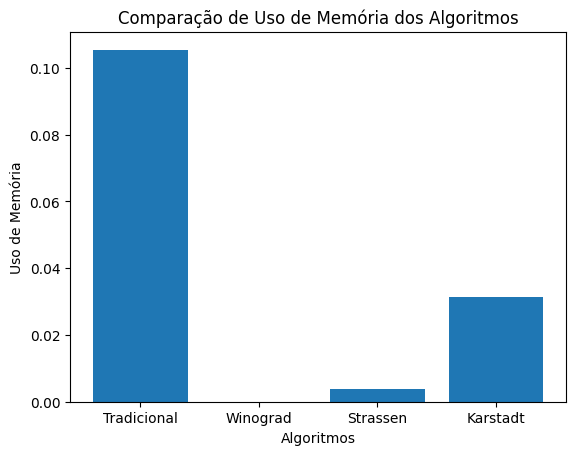

In [40]:
# Create two matrices A and B of size 128x128 with random values between 0 and 1
A = np.random.rand(128, 128)
B = np.random.rand(128, 128)

# Measure the memory usage of each algorithm for matrices A and B
tradicional_memory = measure_memory(AlgTradicional, A, B)
winograd_memory = measure_memory(AlgWinograd, A, B)
strassen_memory = measure_memory(AlgStrassen, A, B)
karstadt_memory = measure_memory(AlgKarstadt, A, B)

# Create a list of algorithm names and their corresponding memory usage
algoritmos = ['Tradicional', 'Winograd', 'Strassen', 'Karstadt']
memory = [tradicional_memory, winograd_memory, strassen_memory, karstadt_memory]

# Crie o gráfico de barras
plt.bar(algoritmos, memory)

# Configure os rótulos dos eixos
plt.xlabel('Algoritmos')
plt.ylabel('Uso de Memória')
plt.title('Comparação de Uso de Memória dos Algoritmos')

# Exiba o gráfico
plt.show()

**Método Tradicional:** É o método básico de multiplicação de matrizes,  para cada elemento da matriz resultante, calcula-se a soma dos produtos correspondentes das linhas e colunas das matrizes. Ele é simples e fácil de entender, mas não é o mais eficiente para matrizes grandes.Esse é frequentemente o menos eficiente para matrizes grandes. Para matrizes muito grandes, o método tradicional pode se tornar impraticável em termos de tempo de execução.

**Algoritmo de Strassen:** Esse método é mais eficiente que o método tradicional. Ele reduz o número de multiplicações necessárias ao utilizar uma técnica de divisão e conquista. Embora seja mais rápido para matrizes grandes, ele pode ter um custo adicional em termos de uso de memória e complexidade de implementação.

**Algoritmo de Winograd:** Esse algoritmo é uma variante do algoritmo de Strassen, mas com uma abordagem que visa reduzir o número de operações aritméticas. Na prática, ele pode ser menos usado devido a sua complexidade de implementação e limitações específicas, tendo que reescrever os codigos a serem utilizados. Embora o algoritmo de Winograd seja uma otimização do método de Strassen, ele não é amplamente utilizado devido à sua complexidade e ao custo adicional de implementação. Em alguns casos, ele pode ser mais lento do que o algoritmo de Strassen puro, especialmente se não houver uma vantagem clara em termos de operações aritméticas reduzidas.

**Algoritmo de Karatsuba:** Este método é mais conhecido por sua aplicação na multiplicação de números inteiros, mas também pode ser adaptado para matrizes, o que o torna mais eficiente que os métodos anteriores em alguns casos. No entanto, sua aplicação direta em matrizes não é tão comum quanto os métodos baseados em Strassen.

#Resumindo os melhores casos:
**Para matrizes grandes:** O algoritmo de Strassen é geralmente preferido por sua complexidade menor em comparação com o método tradicional.
**Para matrizes muito grandes:** Métodos mais avançados ou variantes como o de Winograd podem ser considerados, mas sua implementação pode ser mais complexa.
**Para casos específicos:** O algoritmo de Karatsuba pode ser mais eficiente em contextos específicos, mas não é tão comum para multiplicação de matrizes quanto os métodos baseados em Strassen.

#Resumindo os piores casos:

Método Tradicional: Menos eficiente para matrizes grandes devido à sua complexidade cúbica.
Algoritmo de Winograd: Menos utilizado na prática e pode não oferecer vantagens significativas em alguns contextos.
Algoritmo de Karatsuba: Não é comumente utilizado para multiplicação de matrizes, e pode não ser a melhor escolha comparado a algoritmos mais especializados.

#Conclusão:

 Portanto, o método tradicional é geralmente o pior em termos de eficiência para grandes matrizes, enquanto o algoritmo de Winograd e o de Karatsuba podem não ser tão eficazes ou práticos em muitos casos de multiplicação de matrizes. Para a maioria dos casos gerais envolvendo multiplicação de matrizes grandes, o algoritmo de Strassen é frequentemente o melhor escolha e para matrizes menores o tradicional pode ser muito bem aplicado.